In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
os.chdir('/Users/microwave/AIO_2024/Module_5/Week1')

In [6]:
PATH = 'titanic_modified_dataset.csv'
df = pd.read_csv(PATH,index_col='PassengerId')
df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [7]:
dataset_arr = df.to_numpy().astype(np.float64)

X,y = dataset_arr[:,:-1], dataset_arr[:,-1]


In [8]:
intercept = np.ones((X.shape[0],1))

X_b = np.concatenate((intercept,X),axis=1)

In [11]:
val_size = 0.2
test_size = 0.125
seed = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b,y, test_size= val_size, random_state=seed, shuffle=is_shuffle)
X_train, X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=test_size, random_state=seed, shuffle=is_shuffle)

In [12]:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

In [24]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(X,theta):
    dot_prod = np.dot(X,theta)
    y_hat = sigmoid(dot_prod)
    return y_hat

def compute_loss(y_hat,y):
    y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
    return (-y * np.log(y_hat) - (1-y) * np.log(1-y_hat)).mean()

def compute_gradient(X,y,y_hat):
    return np.dot(X.T,(y_hat - y)) / y.size

def update_theta(theta,gradient,lr):
    return theta - lr * gradient

def compute_accuracy(X,y,theta):
    y_hat = predict(X,theta).round()
    acc = (y_hat == y).mean()
    return acc



In [31]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(42)
theta = np.random.uniform(size = X_train.shape[1])

In [32]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i,theta)

        train_loss = compute_loss(y_hat,y_i)

        grad = compute_gradient(X_i,y_i,y_hat)

        theta = update_theta(theta,grad,lr)

        train_batch_losses.append(train_loss)
        
        train_acc = compute_accuracy(X_train,y_train,theta)
        train_batch_accs.append(train_acc)
        

        y_val_hat = predict(X_val,theta)
        val_loss = compute_loss(y_val_hat,y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val,y_val,theta)
        val_batch_accs.append(val_acc)

    total_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    total_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    total_val_loss = sum(val_batch_losses) / len(val_batch_losses)
    total_val_acc = sum(val_batch_accs) / len(val_batch_accs)
    
    train_accs.append(total_batch_acc)
    train_losses.append(total_batch_loss)
    val_accs.append(total_val_acc)
    val_losses.append(total_val_loss)
    
    print(f'Epoch {epoch+1} \t| Loss: {total_batch_loss:.3f} \t| Accuracy: {total_batch_acc:.3f} \t| Val Loss: {total_val_loss:.3f} \t| Val Accuracy: {total_val_acc:.3f}')

Epoch 1 	| Loss: 0.842 	| Accuracy: 0.616 	| Val Loss: 0.729 	| Val Accuracy: 0.651
Epoch 2 	| Loss: 0.790 	| Accuracy: 0.639 	| Val Loss: 0.695 	| Val Accuracy: 0.668
Epoch 3 	| Loss: 0.745 	| Accuracy: 0.665 	| Val Loss: 0.667 	| Val Accuracy: 0.680
Epoch 4 	| Loss: 0.707 	| Accuracy: 0.683 	| Val Loss: 0.644 	| Val Accuracy: 0.703
Epoch 5 	| Loss: 0.674 	| Accuracy: 0.711 	| Val Loss: 0.624 	| Val Accuracy: 0.718
Epoch 6 	| Loss: 0.646 	| Accuracy: 0.729 	| Val Loss: 0.608 	| Val Accuracy: 0.725
Epoch 7 	| Loss: 0.621 	| Accuracy: 0.734 	| Val Loss: 0.595 	| Val Accuracy: 0.726
Epoch 8 	| Loss: 0.599 	| Accuracy: 0.735 	| Val Loss: 0.583 	| Val Accuracy: 0.725
Epoch 9 	| Loss: 0.580 	| Accuracy: 0.737 	| Val Loss: 0.574 	| Val Accuracy: 0.732


Epoch 10 	| Loss: 0.564 	| Accuracy: 0.747 	| Val Loss: 0.565 	| Val Accuracy: 0.737
Epoch 11 	| Loss: 0.549 	| Accuracy: 0.774 	| Val Loss: 0.558 	| Val Accuracy: 0.742
Epoch 12 	| Loss: 0.537 	| Accuracy: 0.776 	| Val Loss: 0.553 	| Val Accuracy: 0.743
Epoch 13 	| Loss: 0.525 	| Accuracy: 0.783 	| Val Loss: 0.547 	| Val Accuracy: 0.743
Epoch 14 	| Loss: 0.515 	| Accuracy: 0.786 	| Val Loss: 0.543 	| Val Accuracy: 0.742
Epoch 15 	| Loss: 0.507 	| Accuracy: 0.785 	| Val Loss: 0.539 	| Val Accuracy: 0.737
Epoch 16 	| Loss: 0.499 	| Accuracy: 0.785 	| Val Loss: 0.536 	| Val Accuracy: 0.739
Epoch 17 	| Loss: 0.492 	| Accuracy: 0.785 	| Val Loss: 0.533 	| Val Accuracy: 0.743
Epoch 18 	| Loss: 0.486 	| Accuracy: 0.785 	| Val Loss: 0.531 	| Val Accuracy: 0.744
Epoch 19 	| Loss: 0.480 	| Accuracy: 0.785 	| Val Loss: 0.529 	| Val Accuracy: 0.749
Epoch 20 	| Loss: 0.475 	| Accuracy: 0.788 	| Val Loss: 0.527 	| Val Accuracy: 0.749
Epoch 21 	| Loss: 0.470 	| Accuracy: 0.791 	| Val Loss: 0.526 	| 

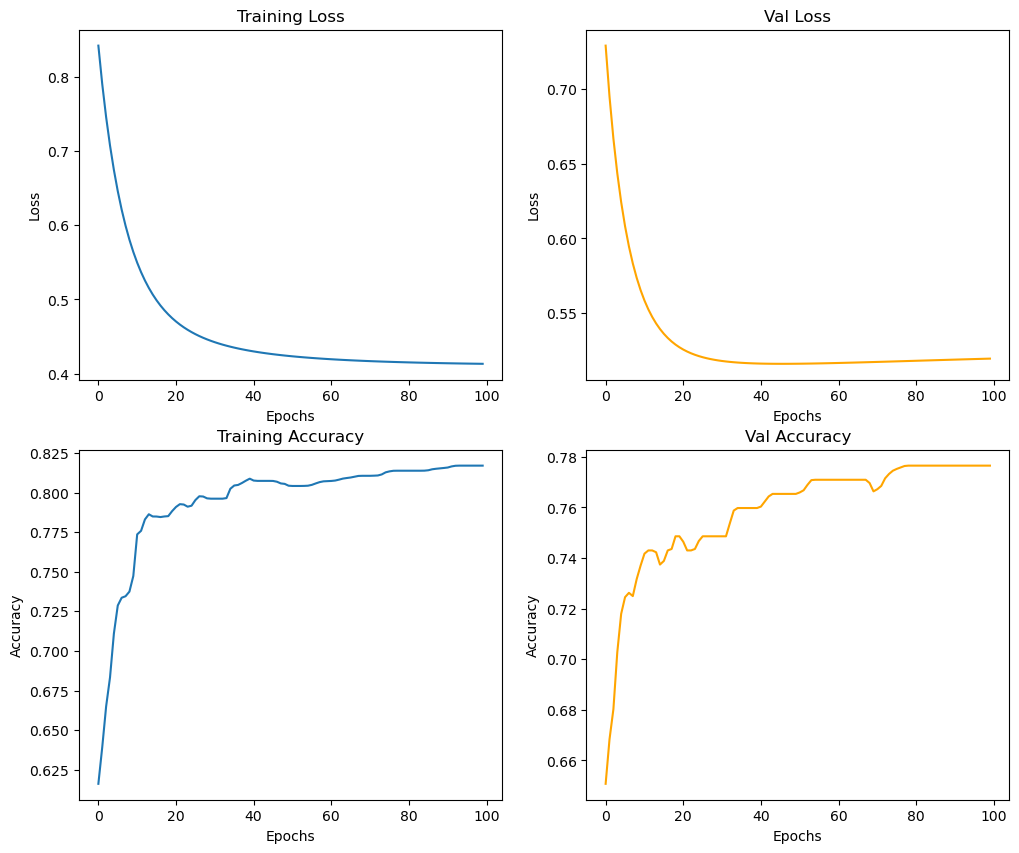

In [33]:
fig, ax = plt.subplots(2,2, figsize = (12,10))

ax[0,0].plot(train_losses)
ax[0,0].set(xlabel = 'Epochs', ylabel = 'Loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_losses,'orange')
ax[0,1].set(xlabel = 'Epochs', ylabel = 'Loss')
ax[0,1].set_title('Val Loss')

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel = 'Epochs', ylabel = 'Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_accs,'orange')
ax[1,1].set(xlabel = 'Epochs', ylabel = 'Accuracy')
ax[1,1].set_title('Val Accuracy')

plt.show()

In [34]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evaluation on Validation Set: ', val_set_acc)
print('Evaluation on Test Set: ', test_set_acc)

Evaluation on Validation Set:  0.776536312849162
Evaluation on Test Set:  0.797752808988764


# Twitter sentiment analysis

In [35]:
import re
import nltk
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [36]:
PATH = 'sentiment_analysis.csv'

df = pd.read_csv(PATH, index_col= 'id')

In [37]:
def text_normalize(text):
# Retweet old acronym "RT" removal
    text = re.sub(r'^RT [\s]+ ', '', text )

    # Hyperlinks removal
    text = re.sub(r'https ?:\/\/.*[\ r\n]* ', '', text )

    # Hashtags removal
    text = re.sub(r'#', '', text )

    # Punctuation removal
    text = re.sub(r'[^\ w\s]', '', text )

    # Tokenization
    tokenizer = TweetTokenizer(preserve_case =False ,strip_handles =True ,reduce_len = True)
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

In [40]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)

        for token in tokens:
            pair = (token,label)
            freqs[pair] += 1

    return freqs



In [41]:
def get_feature(text, freqs):
    tokens = text_normalize(text)

    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token,0)]
        X[2] += freqs[(token,1)]

    return X

In [42]:
X = []
y = []

freqs = get_freqs(df)

for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [43]:
val_size = 0.2
test_size = 0.125
seed = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_size, random_state = seed, shuffle = is_shuffle)
X_train, X_test, y_train,y_test = train_test_split(X_train, y_train, test_size = test_size, random_state = seed, shuffle = is_shuffle)


In [50]:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

In [54]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(X,theta):
    dot_prod = np.dot(X,theta)
    y_hat = sigmoid(dot_prod)
    return y_hat

def compute_loss(y_hat,y):
    y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
    return (-y * np.log(y_hat) - (1-y) * np.log(1-y_hat)).mean()

def compute_gradient(X,y,y_hat):
    return np.dot(X.T,(y_hat - y)) / y.size

def update_theta(theta,gradient,lr):
    return theta - lr * gradient

def compute_accuracy(X,y,theta):
    y_hat = predict(X,theta).round()
    acc = (y_hat == y).mean()
    return acc



In [55]:
lr = 0.01
epochs = 200
batch_size = 128 
np.random.seed(42)
theta = np.random.uniform(size = X_train.shape[1])

In [56]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i,theta)

        train_loss = compute_loss(y_hat,y_i)

        grad = compute_gradient(X_i,y_i,y_hat)

        theta = update_theta(theta,grad,lr)

        train_batch_losses.append(train_loss)
        
        train_acc = compute_accuracy(X_train,y_train,theta)
        train_batch_accs.append(train_acc)
        

        y_val_hat = predict(X_val,theta)
        val_loss = compute_loss(y_val_hat,y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val,y_val,theta)
        val_batch_accs.append(val_acc)

    total_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    total_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    total_val_loss = sum(val_batch_losses) / len(val_batch_losses)
    total_val_acc = sum(val_batch_accs) / len(val_batch_accs)
    
    train_accs.append(total_batch_acc)
    train_losses.append(total_batch_loss)
    val_accs.append(total_val_acc)
    val_losses.append(total_val_loss)
    
    print(f'Epoch {epoch+1} \t| Loss: {total_batch_loss:.3f} \t| Accuracy: {total_batch_acc:.3f} \t| Val Loss: {total_val_loss:.3f} \t| Val Accuracy: {total_val_acc:.3f}')

Epoch 1 	| Loss: 1.040 	| Accuracy: 0.543 	| Val Loss: 1.031 	| Val Accuracy: 0.532
Epoch 2 	| Loss: 0.950 	| Accuracy: 0.543 	| Val Loss: 0.941 	| Val Accuracy: 0.532
Epoch 3 	| Loss: 0.871 	| Accuracy: 0.543 	| Val Loss: 0.863 	| Val Accuracy: 0.532
Epoch 4 	| Loss: 0.804 	| Accuracy: 0.543 	| Val Loss: 0.797 	| Val Accuracy: 0.532
Epoch 5 	| Loss: 0.749 	| Accuracy: 0.543 	| Val Loss: 0.743 	| Val Accuracy: 0.532
Epoch 6 	| Loss: 0.706 	| Accuracy: 0.543 	| Val Loss: 0.701 	| Val Accuracy: 0.532
Epoch 7 	| Loss: 0.673 	| Accuracy: 0.637 	| Val Loss: 0.669 	| Val Accuracy: 0.633
Epoch 8 	| Loss: 0.648 	| Accuracy: 0.639 	| Val Loss: 0.646 	| Val Accuracy: 0.637
Epoch 9 	| Loss: 0.629 	| Accuracy: 0.685 	| Val Loss: 0.628 	| Val Accuracy: 0.684
Epoch 10 	| Loss: 0.616 	| Accuracy: 0.721 	| Val Loss: 0.615 	| Val Accuracy: 0.722
Epoch 11 	| Loss: 0.606 	| Accuracy: 0.739 	| Val Loss: 0.606 	| Val Accuracy: 0.736
Epoch 12 	| Loss: 0.598 	| Accuracy: 0.743 	| Val Loss: 0.599 	| Val Accur

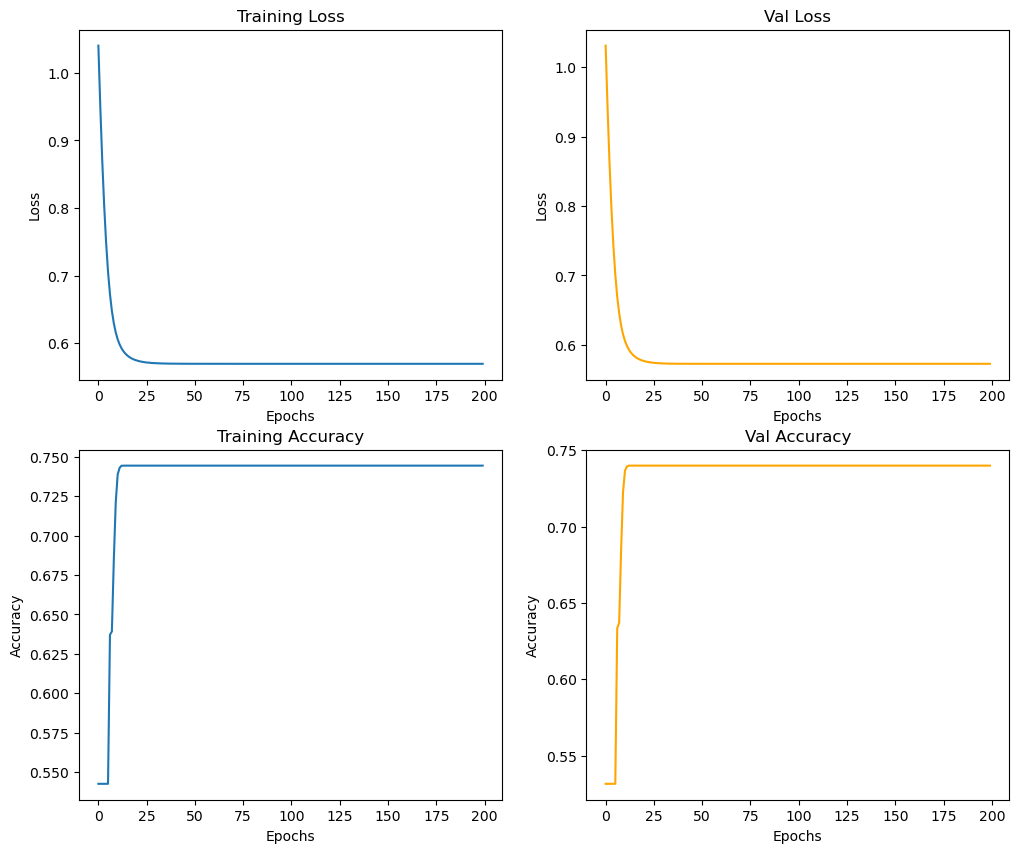

In [57]:
fig, ax = plt.subplots(2,2, figsize = (12,10))

ax[0,0].plot(train_losses)
ax[0,0].set(xlabel = 'Epochs', ylabel = 'Loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_losses,'orange')
ax[0,1].set(xlabel = 'Epochs', ylabel = 'Loss')
ax[0,1].set_title('Val Loss')

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel = 'Epochs', ylabel = 'Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_accs,'orange')
ax[1,1].set(xlabel = 'Epochs', ylabel = 'Accuracy')
ax[1,1].set_title('Val Accuracy')

plt.show()

In [58]:
X = [[22.3,-1.5,1.1,1]]
theta = [0.1,-0.15,0.3,-0.2]
print(predict(X,theta))

[0.92988994]


In [61]:
y = np.array([1,0,0,1])
y_hat = np.array([0.8,0.75,0.3,0.95])

print(round(compute_loss(y_hat,y),3))

0.504


In [63]:
X = np.array([[1,2],[2,1],[1,1],[2,2]])
y_true = np.array([0,1,0,1])
y_pred = np.array([0.25,0.75,0.4,0.8])

print(compute_gradient(X,y_true,y_pred))

[-0.0625  0.0625]


In [66]:
def compute_accuracy(y_true,y_pred):
    y_pred = np.round(y_pred)
    acc = np.mean(y_pred == y_true)
    return acc
y_true = [1,0,1,1]
y_pred = [0.85,0.35,0.9,0.75]
print(compute_accuracy(y_true,y_pred))

1.0


In [68]:
def compute_gradient(X,y,y_hat):
    grad = np.dot(X.T,(y_hat - y)) / y.size
    return grad

X = np.array([[1,3],[2,1],[3,2],[1,2]])
y_true = np.array([1,0,1,1])
y_pred = np.array([0.7,0.4,0.6,0.85])

print(compute_gradient(X,y_true,y_pred))

[-0.2125 -0.4   ]
